# Welcome to the interactive Galaxy IPython Notebook.

You can access your data via the dataset number. Using a Python kernel, you can access dataset number 42 with ``handle = open(get(42), 'r')``.
To save data, write your data to a file, and then call ``put('filename.txt')``. The dataset will then be available in your galaxy history.
<br>When using a non-Python kernel, ``get`` and ``put`` are available as command-line tools, which can be accessed using system calls in R, Julia, and Ruby. For example, to read dataset number 42 into R, you can write ```handle <- file(system('get -i 42', intern = TRUE))```.
To save data in R, write the data to a file and then call ``system('put -p filename.txt')``.
Notebooks can be saved to Galaxy by clicking the large green button at the top right of the IPython interface.<br>
More help and informations can be found on the project [website](https://github.com/bgruening/docker-jupyter-notebook).

In [1]:
import s3fs
import xarray as xr

In [11]:
import s3fs
fs = s3fs.S3FileSystem(  
            anon=True,
            client_kwargs={"endpoint_url": "https://climate.uiogeo-apps.sigma2.no/" },
        )

In [12]:
fs.ls('obsdata')

['obsdata/.minio.sys', 'obsdata/.tools', 'obsdata/Tier2', 'obsdata/Tier3']

In [16]:
fs.ls('rawdata/obs')

['rawdata/obs/Tier2', 'rawdata/obs/Tier3']

In [17]:
fs.ls('ESGF/obs4MIPs')

['ESGF/obs4MIPs/ATSR',
 'ESGF/obs4MIPs/CERES-EBAF',
 'ESGF/obs4MIPs/GPCP-SG',
 'ESGF/obs4MIPs/NASA-GSFC',
 'ESGF/obs4MIPs/NASA-JPL']

In [15]:
fs.ls('CMIP6')

['CMIP6/ ',
 'CMIP6/.ipynb_checkpoints',
 'CMIP6/1pctCO2',
 'CMIP6/1pctCO2-bgc',
 'CMIP6/1pctCO2-cdr',
 'CMIP6/DO_NOT_PUT_MERGED_FILES_HERE',
 'CMIP6/NEGI-Abisko',
 'CMIP6/NEGI-Andoya',
 'CMIP6/README',
 'CMIP6/README~',
 'CMIP6/SSPs',
 'CMIP6/abrupt-0p5xCO2',
 'CMIP6/abrupt-2xCO2',
 'CMIP6/abrupt-4xCO2',
 'CMIP6/abrupt-solm4p',
 'CMIP6/abrupt-solp4p',
 'CMIP6/adagj.txt',
 'CMIP6/data',
 'CMIP6/dcppA-assim',
 'CMIP6/esg_trusted_certificates.tar',
 'CMIP6/esg_trusted_certificates.tar.1',
 'CMIP6/esm-hist',
 'CMIP6/esm-pi-CO2pulse',
 'CMIP6/esm-pi-cdr-pulse',
 'CMIP6/esm-piControl',
 'CMIP6/esm-piControl-spinup',
 'CMIP6/esmvaltool_config_files_sample',
 'CMIP6/faf-all',
 'CMIP6/faf-heat',
 'CMIP6/faf-heat-NA50pct',
 'CMIP6/faf-passiveheat',
 'CMIP6/faf-stress',
 'CMIP6/faf-water',
 'CMIP6/highres-future',
 'CMIP6/hist-1950',
 'CMIP6/hist-GHG',
 'CMIP6/hist-aer',
 'CMIP6/hist-bgc',
 'CMIP6/hist-nat',
 'CMIP6/hist-noLu',
 'CMIP6/hist-piAer',
 'CMIP6/hist-piNTCF',
 'CMIP6/hist-resIPO',
 'C

In [24]:
s3path = 's3://obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_*.nc'

In [25]:
remote_files = fs.glob(s3path)

In [26]:
remote_files

['obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198001-198012.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198101-198112.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198201-198212.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198301-198312.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198401-198412.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198501-198512.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198601-198612.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198701-198712.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198801-198812.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_198901-198912.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_199001-199012.nc',
 'obsdata/Tier3/ERA-Interim/OBS6_ERA-Interim_reanaly_1_Amon_zg_199101-199112.nc',
 'obsdata/Tier3/

In [27]:
# Iterate through remote_files to create a fileset
fileset = [fs.open(file) for file in remote_files]

# This works
data = xr.open_mfdataset(fileset, combine='by_coords')

In [28]:
data

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 241, lon: 480, plev: 19, time: 300)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2004-12-16T12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat        (lat) float64 -90.0 -89.25 -88.5 -87.75 ... 87.75 88.5 89.25 90.0
  * lon        (lon) float64 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
Dimensions without coordinates: bnds
Data variables:
    zg         (time, plev, lat, lon) float32 dask.array<chunksize=(12, 19, 241, 480), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    plev_bnds  (time, plev, bnds) float64 dask.array<chunksize=(12, 19, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(12, 241, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(12, 480, 2), meta=np.ndarray>
Attributes: (12/13)
    comment:         'Contains modified Copernicus Climate Change Service Inf...
    history:         Created on 2020-08-06 13:23:33
    host:            ipcc
    mip:             Amon
    modeling_realm:  reanaly
    project_id:      OBS6
    ...              ...
    source:          www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/...
    tier:            3
    title:           ERA-Interim data reformatted for ESMValTool v2.0.0
    user:            yanchun
    version:         1
    Conventions:     CF-1.7

/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


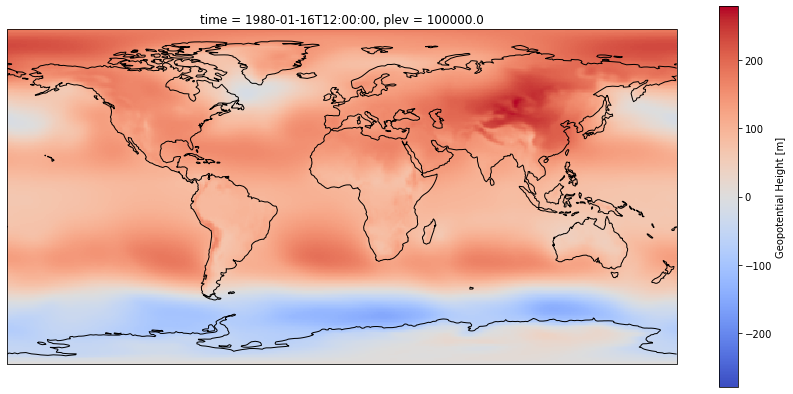

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(1, figsize=[15,7])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
data['zg'].isel(time=0,plev=0).plot(ax=ax, cmap='coolwarm')